<a href="https://colab.research.google.com/github/the-black-viper/ml/blob/main/Copy_of_Javier_EE298_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt


In [28]:
def positional_encoding(pos, dim):
  """Custom positional encoding using alternate sin and cos"""
  rate = pos*(dim//2)
  # Initialize a square matrix
  basis = np.zeros([pos, dim])
  # Define the domain
  x = np.linspace(0, 2*np.pi, rate)
  
  # Get the respective sin and cos vectors
  cos_vector = np.cos(x)
  sin_vector = np.sin(x)
  
  # Reshape for fitting to the basis matrix
  reshaped_cos = cos_vector.reshape([dim//2,pos]).T
  reshaped_sin = sin_vector.reshape([dim//2, pos]).T

  # Apply sin to even indices in the array; 2i
  basis[:, 0::2] = reshaped_sin
  # Apply cos to odd indices in the array; 2i+1
  basis[:, 1::2] = reshaped_cos
  return basis

In [29]:
# Create a 16x16 Positional Encoding
tokens = 16
dimensions = 16
basis = positional_encoding(tokens, dimensions)

In [30]:
# Check for orthogonality
orthogonal = np.dot(basis.T, basis)
print(orthogonal.round(2))  # The dot product test did not produce an identity 
                            # matrix therefore it is not orthogonal

[[  2.7    4.86   5.35   1.5    4.83  -2.76   1.43  -5.37  -2.82  -4.79
   -5.39  -1.36  -4.76   2.88  -1.3    5.41]
 [  4.86  13.3   12.88   5.89  13.24  -5.03   5.73 -12.95  -5.19 -13.18
  -13.02  -5.57 -13.11   5.35  -5.41  13.09]
 [  5.35  12.88  12.93   5.24  12.81  -5.51   5.08 -12.99  -5.67 -12.74
  -13.05  -4.92 -12.67   5.83  -4.76  13.11]
 [  1.5    5.89   5.24   3.07   5.87  -1.57   3.01  -5.28  -1.64  -5.85
   -5.32  -2.94  -5.83   1.71  -2.88   5.35]
 [  4.83  13.24  12.81   5.87  13.18  -4.99   5.71 -12.88  -5.15 -13.12
  -12.95  -5.55 -13.05   5.32  -5.39  13.02]
 [ -2.76  -5.03  -5.51  -1.57  -4.99   2.82  -1.5    5.53   2.88   4.96
    5.55   1.43   4.92  -2.94   1.36  -5.57]
 [  1.43   5.73   5.08   3.01   5.71  -1.5    2.95  -5.12  -1.57  -5.69
   -5.15  -2.88  -5.67   1.64  -2.82   5.19]
 [ -5.37 -12.95 -12.99  -5.28 -12.88   5.53  -5.12  13.05   5.69  12.82
   13.12   4.96  12.74  -5.85   4.79 -13.18]
 [ -2.82  -5.19  -5.67  -1.64  -5.15   2.88  -1.57   5.69   2.95

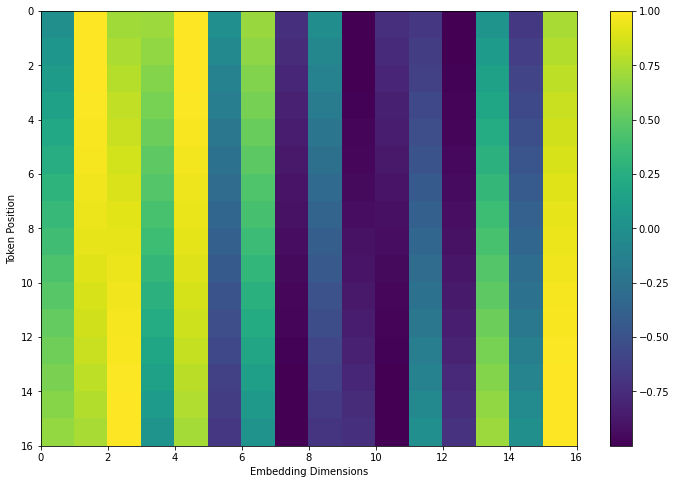

In [31]:
# Plot of the initial matrix
plt.figure(figsize=(12,8))
plt.pcolormesh(basis, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [32]:
# Gram-schmidt modified from boilerplate template by Marius Retegan
def gram_schmidt(A):
    """Orthogonalize a set of vectors stored as the columns of matrix A."""
    # Get the number of vectors (This will be the # of columns(n)).
    m, n = A.shape  
    Q =  A.astype(np.float64)
    for j in range(n):
      # To orthogonalize the vector in column j with respect to the
      # previous vectors, subtract from it its projection onto
      # each of the previous vectors.
      for i, k in enumerate(range(j)):
        Q[:, j] -= np.dot(Q[:, k], Q[:, j]) * Q[:, k]
      Q[:, j] = Q[:, j]/np.linalg.norm(Q[:, j])
    return Q


In [33]:
# Test matrices for the gram-schmidt implementation
A = np.array([1,1,1,-1,0,1,1,1,2]).reshape(3,3)
B = np.array([1,2,4,0,0,5,0,3,6]).reshape(3,3)
QA = gram_schmidt(A)
ortho_a = np.matmul(QA.T, QA) # Sanity check, the resulting matrix is an identity matrix
QB = gram_schmidt(B)          # therefore QA is orthonormal
ortho_b = np.matmul(QB.T, QB) # Sanity check, the resulting matrix is an identity matrix
                              # therefore QB is orthonormal
print('A', ortho_a.round(5))
print('B', ortho_b.round(5))

A [[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]
B [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
Q = gram_schmidt(basis) # Orthonormalize using the G-S method
W = np.matmul(Q.T, Q) # Sanity check, the resulting matrix is not a perfect identity matrix
print(W.round(5))     # this could be attributed to rounding errors in the CGS

[[ 1.      -0.       0.24222  0.0263   0.49984 -0.45217 -0.00241  0.38264
   0.36042 -0.10072 -0.21968 -0.11161 -0.028    0.1614  -0.0456   0.17338]
 [-0.       1.      -0.07204 -0.39477 -0.09576  0.13595 -0.27848  0.65162
  -0.21317  0.40071 -0.0215  -0.05918 -0.19751  0.08425  0.15024 -0.10165]
 [ 0.24222 -0.07204  1.       0.       0.       0.       0.       0.
  -0.      -0.      -0.       0.      -0.       0.       0.      -0.     ]
 [ 0.0263  -0.39477  0.       1.      -0.       0.      -0.       0.
  -0.       0.      -0.       0.      -0.       0.       0.      -0.     ]
 [ 0.49984 -0.09576  0.      -0.       1.       0.       0.      -0.
  -0.       0.      -0.      -0.       0.      -0.      -0.       0.     ]
 [-0.45217  0.13595  0.       0.       0.       1.      -0.       0.
  -0.      -0.      -0.      -0.      -0.       0.       0.      -0.     ]
 [-0.00241 -0.27848  0.      -0.       0.      -0.       1.      -0.
   0.       0.      -0.       0.      -0.       0.       

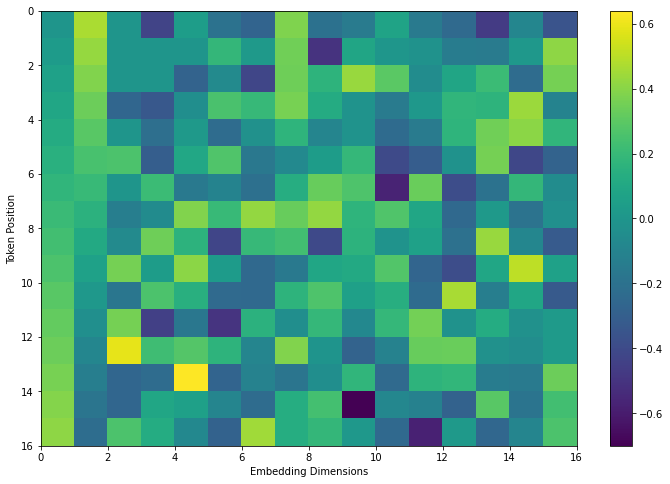

In [35]:
# Plot of the new matrix
plt.figure(figsize=(12,8))
plt.pcolormesh(Q, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()